In [4]:
import torch                     # importing libraries
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import make_circles  # circle dataset loading

X, y = make_circles(2000, noise = 0.02, random_state = 40)

In [5]:
data = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "y": y})

In [6]:
data.head()

,X0,X1,y
0,-0.858448,0.477564,0
1,-0.826947,0.019166,1
2,-0.598143,-0.557144,1
3,0.640728,0.471827,1
4,-0.276468,0.769391,1


<ipython-input-23-47cd404bcf61>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x=X[:,0], y=X[:,1],c=y, cmap=plt.cm.get_cmap( 'RdYlBu_r',10))


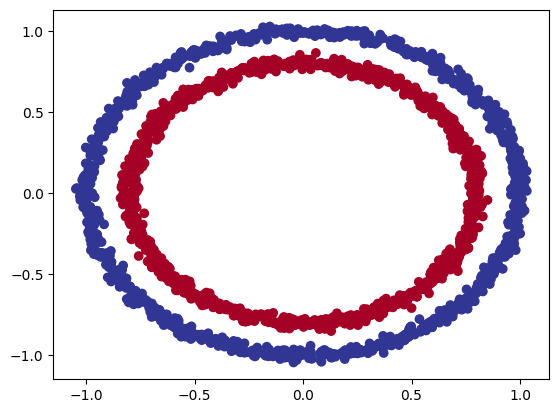

In [23]:
plt.scatter(x=X[:,0], y=X[:,1],c=y, cmap=plt.cm.get_cmap( 'RdYlBu_r',10))
plt.show()


In [24]:
print(X.shape, y.shape)

(2000, 2) (2000,)


In [25]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [28]:
X.dtype

torch.float32

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting iin training and testt set

len(X_train), len(X_test), len(y_train), len(y_test)

(1600, 400, 1600, 400)

In [32]:
model = nn.Sequential(                        # nn.Sequential is for straight-forward computations as it always runs in sequential order
    nn.Linear(in_features=2, out_features=6),
    nn.Linear(in_features=6, out_features=1)
)

In [33]:
model

Sequential(
  (0): Linear(in_features=2, out_features=6, bias=True)
  (1): Linear(in_features=6, out_features=1, bias=True)
)

torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).

torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in

In [36]:
loss_fn = nn.BCEWithLogitsLoss()  # loss function  tells how wrong our model gives prediction

optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01) # the goal of optimizer is to optimizer our model parameters in such a way that loss_fn go down

In [37]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [40]:
torch.manual_seed(42)

for epoch in range(50):
  # Training
  model.train()
  #  Forward propagation
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # calculate loss/ accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  # Loss backwards
  loss.backward()
  # optimizer steps
  optimizer.step()
  # Optimizer step
  model.eval()
  #Testing
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  if epoch%2==0:
    print(f"Epochs: {epoch}  Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epochs: 0  Loss: 0.70182, Accuracy: 48.38% | Test loss: 0.71604, Test acc: 48.38%
Epochs: 2  Loss: 0.70169, Accuracy: 48.31% | Test loss: 0.71584, Test acc: 48.31%
Epochs: 4  Loss: 0.70157, Accuracy: 48.25% | Test loss: 0.71564, Test acc: 48.25%
Epochs: 6  Loss: 0.70144, Accuracy: 48.19% | Test loss: 0.71545, Test acc: 48.19%
Epochs: 8  Loss: 0.70132, Accuracy: 48.25% | Test loss: 0.71526, Test acc: 48.25%
Epochs: 10  Loss: 0.70120, Accuracy: 48.38% | Test loss: 0.71507, Test acc: 48.38%
Epochs: 12  Loss: 0.70108, Accuracy: 48.38% | Test loss: 0.71489, Test acc: 48.38%
Epochs: 14  Loss: 0.70097, Accuracy: 48.31% | Test loss: 0.71471, Test acc: 48.31%
Epochs: 16  Loss: 0.70086, Accuracy: 48.19% | Test loss: 0.71453, Test acc: 48.19%
Epochs: 18  Loss: 0.70075, Accuracy: 48.19% | Test loss: 0.71435, Test acc: 48.19%
Epochs: 20  Loss: 0.70064, Accuracy: 48.25% | Test loss: 0.71417, Test acc: 48.25%
Epochs: 22  Loss: 0.70053, Accuracy: 48.38% | Test loss: 0.71400, Test acc: 48.38%
Epochs: 2

In [44]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

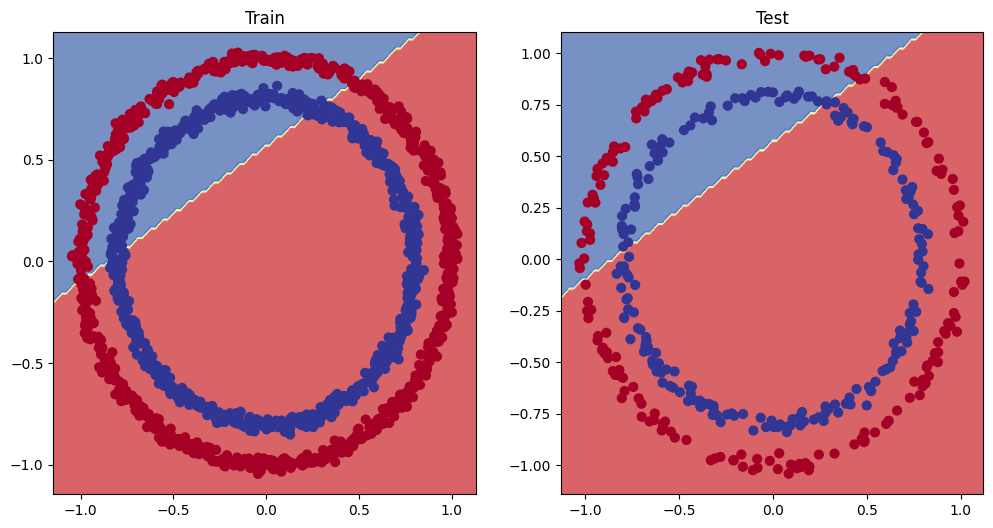

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

### As above because of linear model I applied previously the model is giving 49 percent accuracy ###